In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.optimize as opt    
import scipy.io as sio
import seaborn as sns
from datetime import datetime
from PIL import Image
from scipy.io import loadmat
from skimage.io import imread
from sklearn.linear_model import LogisticRegression

In [2]:
dir = '/Users/michellewang/Desktop/Spring2023/CS4262/data/OriginalDataset'

dataset = []

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        brain_img = imread(imgpath, 0)
        image = np.array(brain_img).flatten()
        dataset.append([image, label])

In [3]:
x = []
y = []

for i in range(len(dataset)):
    x.append(dataset[i][0])
    y.append(dataset[i][1])

In [4]:
x_arr = np.array(x)
x_arr.shape

(6400, 36608)

In [5]:
y_arr = np.array(y)
y_arr.shape

(6400,)

In [6]:
df = pd.DataFrame(np.c_[x,y])

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,36608
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df[36608].value_counts()

2    3200
3    2240
0     896
1      64
Name: 36608, dtype: int64

<AxesSubplot: ylabel='count'>

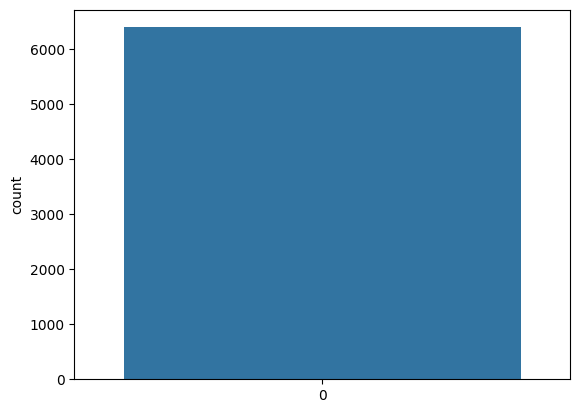

In [9]:
sns.countplot(df[36608])

# Train/Test Dataset

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x_arr, y_arr, test_size=0.2, random_state=42)

In [11]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((5120, 36608), (1280, 36608), (5120,), (1280,))

## Visualize Training Set

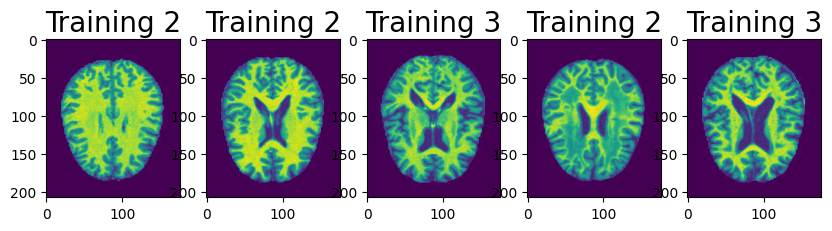

In [12]:
plt.figure(figsize=(10,4))
for index,(image,label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(208,176)))
    plt.title('Training %d' % label,fontsize=20)
    plt.plot()

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# multi_class: ovr, multinomial
# penalty: l1, l2, elasticnet
# C: 0.1, 1

multi_class = ['ovr', 'multinomial']
penalty = ['l1', 'l2', 'elasticnet']
C = [0.1, 1]
lg=LogisticRegression(penalty='l1', C=0.1, solver='saga', multi_class='ovr')
lg.fit(train_x, train_y)

/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
pred=lg.predict(test_x)
pred

array([2, 2, 3, ..., 2, 0, 3])

In [15]:
scores=lg.score(test_x, test_y)
scores

0.9546875

In [13]:
print("Time started:", datetime.now())
lg4=LogisticRegression(penalty='l1', C=1, solver='saga', multi_class='multinomial')
lg4.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-19 23:22:00.986836
Time ended: 2023-04-19 23:29:29.117863


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
pred4=lg4.predict(test_x)
scores4=lg4.score(test_x, test_y)
print("l1, 1, multinomial:", scores4)

l1, 1, multinomial: 0.95859375


In [15]:
print("Time started:", datetime.now())
lg5=LogisticRegression(penalty='l2', C=0.1, solver='saga', multi_class='ovr')
lg5.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-19 23:34:04.153372


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Time ended: 2023-04-19 23:43:03.453009


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
pred5=lg5.predict(test_x)
scores5=lg5.score(test_x, test_y)
print("l2, 0.1, ovr:", scores5)

l2, 0.1, ovr: 0.9421875


In [18]:
print("Time started:", datetime.now())
lg6=LogisticRegression(penalty='l2', C=0.1, solver='saga', multi_class='multinomial')
lg6.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-19 23:50:36.495992
Time ended: 2023-04-19 23:55:58.424643


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
pred6=lg6.predict(test_x)
scores6=lg6.score(test_x, test_y)
print("l2, 0.1, multinomial:", scores6)

l2, 0.1, multinomial: 0.959375


In [21]:
print("Time started:", datetime.now())
lg7=LogisticRegression(penalty='l2', C=1, solver='saga', multi_class='ovr')
lg7.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-19 23:59:09.372252


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Time ended: 2023-04-20 00:06:40.217138


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
pred7=lg7.predict(test_x)
scores7=lg7.score(test_x, test_y)
print("l2, 1, ovr:", scores7)

l2, 1, ovr: 0.9421875


In [24]:
print("Time started:", datetime.now())
lg8=LogisticRegression(penalty='l2', C=1, solver='saga', multi_class='multinomial')
lg8.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-20 00:18:38.472019
Time ended: 2023-04-20 00:24:08.147409


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
pred8=lg8.predict(test_x)
scores8=lg8.score(test_x, test_y)
print("l2, 1, multinomial:", scores8)

l2, 1, multinomial: 0.959375


In [31]:
print("Time started:", datetime.now())
lg9=LogisticRegression(penalty='elasticnet', C=1, solver='saga', multi_class='multinomial', l1_ratio=0.5)
lg9.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-20 03:36:14.154717
Time ended: 2023-04-20 03:43:12.075420


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
pred9=lg9.predict(test_x)
scores9=lg9.score(test_x, test_y)
print("elasticnet, 1, multinomial:", scores9)

elasticnet, 1, multinomial: 0.95859375


In [33]:
print("Time started:", datetime.now())
lg10=LogisticRegression(penalty='elasticnet', C=1, solver='saga', multi_class='ovr', l1_ratio=0.5)
lg10.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-20 03:51:59.313892


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Time ended: 2023-04-20 04:02:17.802936


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [34]:
pred10=lg10.predict(test_x)
scores10=lg10.score(test_x, test_y)
print("elasticnet, 1, ovr:", scores10)

elasticnet, 1, ovr: 0.9421875


In [35]:
print("Time started:", datetime.now())
lg11=LogisticRegression(penalty='elasticnet', C=0.1, solver='saga', multi_class='ovr', l1_ratio=0.5)
lg11.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-20 04:18:41.844431


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Time ended: 2023-04-20 04:29:09.610787


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
pred11=lg11.predict(test_x)
scores11=lg11.score(test_x, test_y)
print("elasticnet, 0.1, ovr:", scores11)

elasticnet, 0.1, ovr: 0.9421875


In [40]:
print("Time started:", datetime.now())
lg12=LogisticRegression(penalty='elasticnet', C=0.1, solver='saga', multi_class='multinomial', l1_ratio=0.5)
lg12.fit(train_x, train_y)
print("Time ended:", datetime.now())

Time started: 2023-04-20 04:55:46.665067
Time ended: 2023-04-20 05:03:05.907056


/opt/miniconda3/envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
pred12=lg12.predict(test_x)
scores12=lg12.score(test_x, test_y)
print("elasticnet, 0.1, multinomial:", scores12)

elasticnet, 0.1, multinomial: 0.95859375


In [7]:
data = [['l1', 0.1, 'ovr', 0.9414], ['l1', 0.1, 'multinomial', 0.9578], ['l1', 1, 'ovr', 0.9414], ['l1', 1, 'multinomial', 0.9586],
        ['l2', 0.1, 'ovr', 0.9422], ['l2', 0.1, 'multinomial', 0.9594], ['l2', 1, 'ovr', 0.9422], ['l2', 1, 'multinomial', 0.9594],
        ['elasticnet', 0.1, 'ovr', 0.9422], ['elasticnet', 0.1, 'multinomial', 0.9586], ['elasticnet', 1, 'ovr', 0.9422], ['elasticnet', 1, 'multinomial', 0.9586]]

df = pd.DataFrame(data, columns=['Penalty', 'C', 'Multiclass', 'Accuracy'])
df

,Penalty,C,Multiclass,Accuracy
0,l1,0.1,ovr,0.9414
1,l1,0.1,multinomial,0.9578
2,l1,1.0,ovr,0.9414
3,l1,1.0,multinomial,0.9586
4,l2,0.1,ovr,0.9422
5,l2,0.1,multinomial,0.9594
6,l2,1.0,ovr,0.9422
7,l2,1.0,multinomial,0.9594
8,elasticnet,0.1,ovr,0.9422
9,elasticnet,0.1,multinomial,0.9586


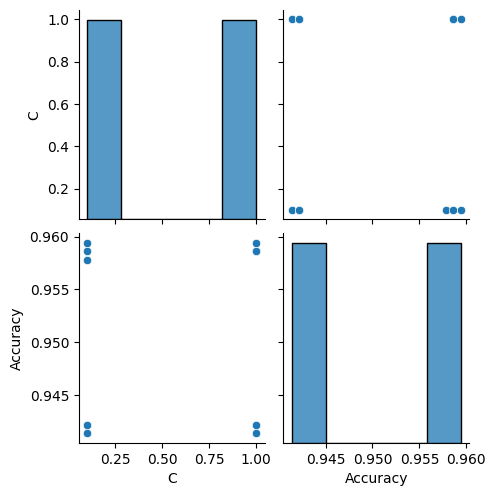

In [10]:
sns.pairplot(df, kind='scatter')